In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size = 4

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


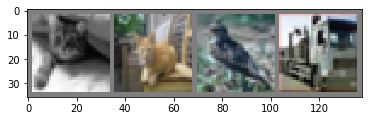

  cat   cat  bird truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
print(len(trainset))

50000


In [12]:
import time

def trainer(dataloader, net, optimizer, criterion, printing=False):
    data_size = len(trainloader.__dict__['dataset'].__dict__['data'])
    batch_size = trainloader.__dict__['batch_size']
    total_loss = 0.0
    t0 = time.time()
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
        if printing:
            elapsed_time = time.time() - t0
            progress = (i + 1) * batch_size / data_size
            time_left = elapsed_time / progress - elapsed_time
            #print('\r{0:4d}'.format(i), end='')
            print('\r{0:5d}/{1} Elapsed time: {2:.2f} s Estimated time left: {3:.2f} s     '.format(i * batch_size, data_size, elapsed_time, time_left), end='')
            #print('\r{0:5d}/{0} Elapsed time: {0:.2f} s'.format(i * batch_size, end=''))

    # Print new line
    print('\rTraining with {0} inputs done after {1:.2f} seconds.'.format(data_size, time.time() - t0))
    print()
    return total_loss

In [13]:
for epoch in range(2):
    trainer(trainloader, net, optimizer, criterion, True)

Training with 50000 inputs done after 37.04 seconds.t: 0.00 s      

Training with 50000 inputs done after 37.34 seconds.t: 0.00 s      



In [8]:
import time
losses = []
times = []
for epoch in range(2):  # loop over the dataset multiple times
    total_loss = 0.0
    running_loss = 0.0
    t0 = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        total_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('Done: [%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    t1 = time.time()
    print('Time elapsed: {} s', t1-t0)
    times.append(t1-t0)
            
    losses.append(total_loss * batch_size / len(trainset))

print('Finished Training')
print(losses)
print(times)

Done: [1,  2000] loss: 2.251


KeyboardInterrupt: 

In [11]:
for epoch in range(2):
    trainer(trainloader, net, optimizer, criterion, True)

    0/50000 Elapsed time: 0.03 s Estimated time left: 0.03 s
    4/50000 Elapsed time: 0.04 s Estimated time left: 0.04 s
    8/50000 Elapsed time: 0.04 s Estimated time left: 0.04 s
   12/50000 Elapsed time: 0.05 s Estimated time left: 0.05 s
   16/50000 Elapsed time: 0.05 s Estimated time left: 0.05 s
   20/50000 Elapsed time: 0.05 s Estimated time left: 0.05 s
   24/50000 Elapsed time: 0.06 s Estimated time left: 0.06 s
   28/50000 Elapsed time: 0.06 s Estimated time left: 0.06 s
   32/50000 Elapsed time: 0.07 s Estimated time left: 0.07 s
   36/50000 Elapsed time: 0.07 s Estimated time left: 0.07 s
   40/50000 Elapsed time: 0.07 s Estimated time left: 0.07 s
   44/50000 Elapsed time: 0.08 s Estimated time left: 0.08 s
   48/50000 Elapsed time: 0.08 s Estimated time left: 0.08 s
   52/50000 Elapsed time: 0.08 s Estimated time left: 0.08 s
   56/50000 Elapsed time: 0.09 s Estimated time left: 0.09 s
   60/50000 Elapsed time: 0.09 s Estimated time left: 0.09 s
   64/50000 Elapsed time

  776/50000 Elapsed time: 0.64 s Estimated time left: 0.63 s
  780/50000 Elapsed time: 0.64 s Estimated time left: 0.63 s
  784/50000 Elapsed time: 0.65 s Estimated time left: 0.64 s
  788/50000 Elapsed time: 0.65 s Estimated time left: 0.64 s
  792/50000 Elapsed time: 0.66 s Estimated time left: 0.65 s
  796/50000 Elapsed time: 0.66 s Estimated time left: 0.65 s
  800/50000 Elapsed time: 0.67 s Estimated time left: 0.66 s
  804/50000 Elapsed time: 0.67 s Estimated time left: 0.66 s
  808/50000 Elapsed time: 0.68 s Estimated time left: 0.66 s
  812/50000 Elapsed time: 0.68 s Estimated time left: 0.67 s
  816/50000 Elapsed time: 0.68 s Estimated time left: 0.67 s
  820/50000 Elapsed time: 0.69 s Estimated time left: 0.68 s
  824/50000 Elapsed time: 0.69 s Estimated time left: 0.68 s
  828/50000 Elapsed time: 0.70 s Estimated time left: 0.68 s
  832/50000 Elapsed time: 0.70 s Estimated time left: 0.69 s
  836/50000 Elapsed time: 0.70 s Estimated time left: 0.69 s
  840/50000 Elapsed time

 1568/50000 Elapsed time: 1.25 s Estimated time left: 1.21 s
 1572/50000 Elapsed time: 1.25 s Estimated time left: 1.21 s
 1576/50000 Elapsed time: 1.25 s Estimated time left: 1.21 s
 1580/50000 Elapsed time: 1.26 s Estimated time left: 1.22 s
 1584/50000 Elapsed time: 1.26 s Estimated time left: 1.22 s
 1588/50000 Elapsed time: 1.26 s Estimated time left: 1.22 s
 1592/50000 Elapsed time: 1.27 s Estimated time left: 1.23 s
 1596/50000 Elapsed time: 1.27 s Estimated time left: 1.23 s
 1600/50000 Elapsed time: 1.27 s Estimated time left: 1.23 s
 1604/50000 Elapsed time: 1.28 s Estimated time left: 1.23 s
 1608/50000 Elapsed time: 1.28 s Estimated time left: 1.24 s
 1612/50000 Elapsed time: 1.28 s Estimated time left: 1.24 s
 1616/50000 Elapsed time: 1.28 s Estimated time left: 1.24 s
 1620/50000 Elapsed time: 1.29 s Estimated time left: 1.25 s
 1624/50000 Elapsed time: 1.29 s Estimated time left: 1.25 s
 1628/50000 Elapsed time: 1.29 s Estimated time left: 1.25 s
 1632/50000 Elapsed time

 2312/50000 Elapsed time: 1.85 s Estimated time left: 1.77 s
 2316/50000 Elapsed time: 1.86 s Estimated time left: 1.77 s
 2320/50000 Elapsed time: 1.86 s Estimated time left: 1.77 s
 2324/50000 Elapsed time: 1.86 s Estimated time left: 1.78 s
 2328/50000 Elapsed time: 1.87 s Estimated time left: 1.78 s
 2332/50000 Elapsed time: 1.87 s Estimated time left: 1.78 s
 2336/50000 Elapsed time: 1.87 s Estimated time left: 1.78 s
 2340/50000 Elapsed time: 1.87 s Estimated time left: 1.79 s
 2344/50000 Elapsed time: 1.88 s Estimated time left: 1.79 s
 2348/50000 Elapsed time: 1.88 s Estimated time left: 1.79 s
 2352/50000 Elapsed time: 1.88 s Estimated time left: 1.79 s
 2356/50000 Elapsed time: 1.89 s Estimated time left: 1.80 s
 2360/50000 Elapsed time: 1.89 s Estimated time left: 1.80 s
 2364/50000 Elapsed time: 1.89 s Estimated time left: 1.80 s
 2368/50000 Elapsed time: 1.90 s Estimated time left: 1.81 s
 2372/50000 Elapsed time: 1.90 s Estimated time left: 1.81 s
 2376/50000 Elapsed time

 3076/50000 Elapsed time: 2.46 s Estimated time left: 2.31 s
 3080/50000 Elapsed time: 2.46 s Estimated time left: 2.31 s
 3084/50000 Elapsed time: 2.46 s Estimated time left: 2.31 s
 3088/50000 Elapsed time: 2.47 s Estimated time left: 2.31 s
 3092/50000 Elapsed time: 2.47 s Estimated time left: 2.32 s
 3096/50000 Elapsed time: 2.47 s Estimated time left: 2.32 s
 3100/50000 Elapsed time: 2.48 s Estimated time left: 2.32 s
 3104/50000 Elapsed time: 2.48 s Estimated time left: 2.32 s
 3108/50000 Elapsed time: 2.48 s Estimated time left: 2.33 s
 3112/50000 Elapsed time: 2.48 s Estimated time left: 2.33 s
 3116/50000 Elapsed time: 2.49 s Estimated time left: 2.33 s
 3120/50000 Elapsed time: 2.49 s Estimated time left: 2.34 s
 3124/50000 Elapsed time: 2.49 s Estimated time left: 2.34 s
 3128/50000 Elapsed time: 2.50 s Estimated time left: 2.34 s
 3132/50000 Elapsed time: 2.50 s Estimated time left: 2.34 s
 3136/50000 Elapsed time: 2.50 s Estimated time left: 2.35 s
 3140/50000 Elapsed time

 3836/50000 Elapsed time: 3.06 s Estimated time left: 2.83 s
 3840/50000 Elapsed time: 3.07 s Estimated time left: 2.83 s
 3844/50000 Elapsed time: 3.07 s Estimated time left: 2.83 s
 3848/50000 Elapsed time: 3.07 s Estimated time left: 2.84 s
 3852/50000 Elapsed time: 3.08 s Estimated time left: 2.84 s
 3856/50000 Elapsed time: 3.08 s Estimated time left: 2.84 s
 3860/50000 Elapsed time: 3.08 s Estimated time left: 2.85 s
 3864/50000 Elapsed time: 3.09 s Estimated time left: 2.85 s
 3868/50000 Elapsed time: 3.09 s Estimated time left: 2.85 s
 3872/50000 Elapsed time: 3.09 s Estimated time left: 2.85 s
 3876/50000 Elapsed time: 3.10 s Estimated time left: 2.86 s
 3880/50000 Elapsed time: 3.10 s Estimated time left: 2.86 s
 3884/50000 Elapsed time: 3.10 s Estimated time left: 2.86 s
 3888/50000 Elapsed time: 3.10 s Estimated time left: 2.86 s
 3892/50000 Elapsed time: 3.11 s Estimated time left: 2.87 s
 3896/50000 Elapsed time: 3.11 s Estimated time left: 2.87 s
 3900/50000 Elapsed time

 4636/50000 Elapsed time: 3.67 s Estimated time left: 3.33 s
 4640/50000 Elapsed time: 3.67 s Estimated time left: 3.33 s
 4644/50000 Elapsed time: 3.67 s Estimated time left: 3.33 s
 4648/50000 Elapsed time: 3.68 s Estimated time left: 3.34 s
 4652/50000 Elapsed time: 3.68 s Estimated time left: 3.34 s
 4656/50000 Elapsed time: 3.68 s Estimated time left: 3.34 s
 4660/50000 Elapsed time: 3.69 s Estimated time left: 3.34 s
 4664/50000 Elapsed time: 3.69 s Estimated time left: 3.35 s
 4668/50000 Elapsed time: 3.69 s Estimated time left: 3.35 s
 4672/50000 Elapsed time: 3.70 s Estimated time left: 3.35 s
 4676/50000 Elapsed time: 3.70 s Estimated time left: 3.35 s
 4680/50000 Elapsed time: 3.70 s Estimated time left: 3.36 s
 4684/50000 Elapsed time: 3.71 s Estimated time left: 3.36 s
 4688/50000 Elapsed time: 3.71 s Estimated time left: 3.36 s
 4692/50000 Elapsed time: 3.71 s Estimated time left: 3.36 s
 4696/50000 Elapsed time: 3.72 s Estimated time left: 3.37 s
 4700/50000 Elapsed time

KeyboardInterrupt: 

In [23]:
#print(trainloader.__dict__)
#print(len(trainloader.__dict__['dataset'].__dict__['data']))
#batch_size also possible to get from DataLoader
print(trainloader.__dict__['batch_size'])

4


In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 80 %
Accuracy of  bird : 21 %
Accuracy of   cat : 39 %
Accuracy of  deer : 67 %
Accuracy of   dog : 35 %
Accuracy of  frog : 51 %
Accuracy of horse : 65 %
Accuracy of  ship : 63 %
Accuracy of truck : 49 %
